In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from pandas.tools.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

C:\Users\yvonne\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Context and description of the data

1. Background information on the subject and field of study

2. Information about data collection:

    a. Who collected the data
    
    b. When the data was collected
    
    c. How the data was collected
    
    d. Any implications this may have on analysis

__1. Background information on the subject and field of study.__

The data explores the detailed information of housing located in 351 suburbs in Melhourne. Melbourne is the second-most populous city in Australia, which has prosperous education, economy, entertainment, tourism and etc. Usually, the price of housing varies in a large range, especially in a big city like Melbourne, depends on furnishment, sqft, distance to CBD and neighborhood. We are interested in what partern of housing characteristics will affect the price at different suburbs in Melbourne ciy.

__2. Information about data collection:__

Tony Pino collected the data starting from 2016. This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

# Exploratory Analysis of the Data

1.Summary statistics and the distributional shape of variables in the data

2.Unusual features or outliers present in the data

3.Potential relationships that may exist in the data, including, but not limited to:
   
    a. two-way tables and side-by-side bar charts for relationships between categorical data
    
    b. scatter plots for relationships between numeric data
    
    c. side-by-side histograms or boxplots for relationships between numeric and categorical data

4.Findings should be reported with readable tables or clearly labeled graphs.

5.There must also be text to explain the findings and the included tables.

__1. Summary statistics and the distributional shape of variables in the data__

_Summary statistics of full data_

In [43]:
housing = pd.read_csv("Melbourne_housing_FULL.csv")
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [44]:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


_Distributional shape of variables in the full data_

In [45]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [46]:
print(housing.shape)

(34857, 21)


__2. Unusual features or outliers present in the data__

_In this data, it have columns: Rooms, Bedrooms2, Bathroom. However, in fact, Rooms should including the bedroom and bathroom and here is the unusual thing:_

In [48]:
housing['Real Rooms'] = housing['Rooms'] - housing['Bedroom2']
print(housing.groupby('Real Rooms')['Bathroom'].count())

Real Rooms
-27.0        1
-17.0        1
-7.0         1
-6.0         2
-5.0         1
-3.0         2
-2.0        23
-1.0       248
 0.0     25683
 1.0       569
 2.0        77
 3.0        18
 4.0         4
 8.0         1
Name: Bathroom, dtype: int64


_As table, it easily to see that after we use the number of rooms minus bedrooms, we got the negative number and it is not make sense, also 0. We believed that these three variables is not well-organize._

__3.Potential relationships that may exist in the data, including__

_From the correlation table we can see that the most correlation with the price is "Rooms"; "Bedroom2"; "Bathroom"; "Car"; "BuildingArea"; "Distance"; and "YearBuilt".

In [50]:
corr_matrix = housing.corr()
print(corr_matrix["Price"].sort_values(ascending=False))

Price            1.000000
Rooms            0.465238
Bedroom2         0.430275
Bathroom         0.429878
Car              0.201803
Longtitude       0.197874
BuildingArea     0.100754
Postcode         0.044950
Real Rooms       0.033768
Landsize         0.032748
Propertycount   -0.059017
Distance        -0.211384
Lattitude       -0.215607
YearBuilt       -0.333306
Name: Price, dtype: float64


_Besides, we also explore the correlation between each predictors._

In [51]:
housing.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Real Rooms
Rooms,1.000000,0.465238,0.271511,0.085890,0.946755,0.611826,0.393878,0.037402,0.156229,-0.012749,0.004872,0.103235,-0.071677,0.099010
Price,0.465238,1.000000,-0.211384,0.044950,0.430275,0.429878,0.201803,0.032748,0.100754,-0.333306,-0.215607,0.197874,-0.059017,0.033768
Distance,0.271511,-0.211384,1.000000,0.481566,0.269524,0.126201,0.241835,0.060862,0.076301,0.323059,-0.100417,0.200946,-0.018140,-0.022770
Postcode,0.085890,0.044950,0.481566,1.000000,0.089292,0.120080,0.067886,0.040664,0.042437,0.089805,-0.231027,0.362895,0.017108,-0.010684
Bedroom2,0.946755,0.430275,0.269524,0.089292,1.000000,0.614892,0.388491,0.037019,0.154157,-0.002022,0.003447,0.106164,-0.053451,-0.226636
Bathroom,0.611826,0.429878,0.126201,0.120080,0.614892,1.000000,0.307518,0.036333,0.147558,0.167955,-0.059183,0.106531,-0.032887,-0.049595
Car,0.393878,0.201803,0.241835,0.067886,0.388491,0.307518,1.000000,0.037829,0.104373,0.128702,-0.009020,0.047213,-0.009617,-0.010382
Landsize,0.037402,0.032748,0.060862,0.040664,0.037019,0.036333,0.037829,1.000000,0.354530,0.044474,0.025318,-0.002582,-0.018195,-0.001563
BuildingArea,0.156229,0.100754,0.076301,0.042437,0.154157,0.147558,0.104373,0.354530,1.000000,0.067811,0.017155,-0.002143,-0.024523,0.007241
YearBuilt,-0.012749,-0.333306,0.323059,0.089805,-0.002022,0.167955,0.128702,0.044474,0.067811,1.000000,0.091592,-0.022175,0.022420,-0.032317


_Looking for the distribution of 'Price'_

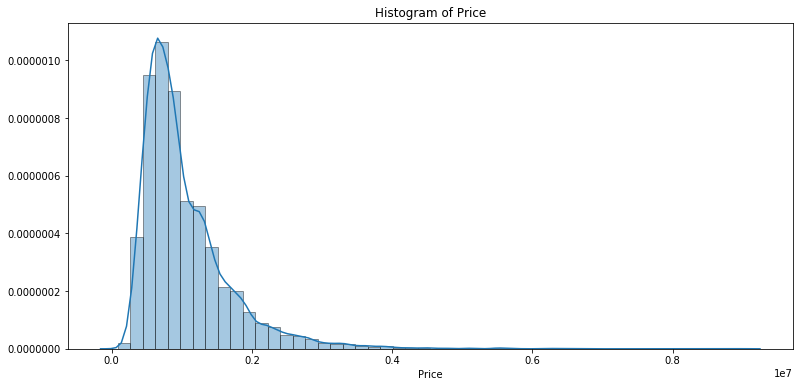

In [93]:
df = housing.loc[(housing['Price'].isnull() == False)]
plt.figure(figsize=(13,6))
sns.distplot(df['Price'], kde = True,hist_kws=dict(edgecolor="k"))
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.show()

__a. two-way tables and side-by-side bar charts for relationships between categorical data__

In [83]:
df = housing[['Rooms', 'Type', 'Price', 'BuildingArea',
              'Method','Distance', 'Bedroom2', 'Bathroom', 
              'Car', 'CouncilArea','Regionname','YearBuilt']]

_Creating a new variable: 'RangeofDistance'_

In [69]:
df["RangeofDistance"] =pd.cut(df.Distance,bins=np.arange(0,60,10),right=False)
housing["RangeofDistance"] =pd.cut(housing.Distance,bins=np.arange(0,60,10),right=False)

C:\Users\yvonne\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\yvonne\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
#cant make the thing I want.....
##From below, easily see that the most close to the Business Center.....
print(df.groupby('RangeofDistance')['Price'].unique())

RangeofDistance
[0, 10)     [1035000.0, 1465000.0, 1600000.0, nan, 1876000...
[10, 20)    [840000.0, 730000.0, 770000.0, nan, 603000.0, ...
[20, 30)    [640000.0, 500000.0, 665000.0, 515500.0, 66000...
[30, 40)    [nan, 611000.0, 755000.0, 320000.0, 480000.0, ...
[40, 50)    [521000.0, 650000.0, 540000.0, nan, 400000.0, ...
Name: Price, dtype: object


_From below can see that as the distance far from Business Center,  the number of rooms,bedroom and Bathrooms would increase. Which mean that if you be want to buy a hourse to invest like for rent the house out, that is not a good choice for some big family._

In [71]:
print(df.groupby('RangeofDistance')['Rooms'].mean())
print(df.groupby('RangeofDistance')['Bedroom2'].mean())
print(df.groupby('RangeofDistance')['Bathroom'].mean())

RangeofDistance
[0, 10)     2.834065
[10, 20)    3.326551
[20, 30)    3.492911
[30, 40)    3.419890
[40, 50)    3.720000
Name: Rooms, dtype: float64
RangeofDistance
[0, 10)     2.807142
[10, 20)    3.315969
[20, 30)    3.490409
[30, 40)    3.417127
[40, 50)    3.720000
Name: Bedroom2, dtype: float64
RangeofDistance
[0, 10)     1.576389
[10, 20)    1.741169
[20, 30)    1.842369
[30, 40)    1.754144
[40, 50)    1.960000
Name: Bathroom, dtype: float64


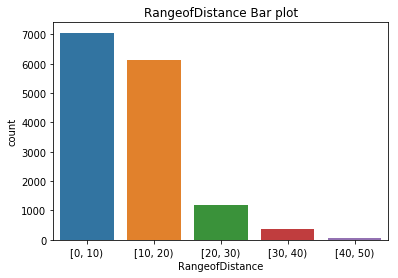

In [72]:
sns.countplot(data = df, x = 'RangeofDistance')
plt.title("RangeofDistance Bar plot")
plt.show()

_Creating a new variable: 'yeargroup'_

In [73]:
housing["yeargroup"] = pd.cut(housing.YearBuilt,bins=np.arange(1900,2030,20),right=False)
housing = housing.loc[(housing['yeargroup'].isnull() == False)]
summary = housing.groupby('yeargroup')[["Price"]].mean()
summary = summary.dropna()
print(summary)
print(summary.shape)

                     Price
yeargroup                 
[1900, 1920)  1.538395e+06
[1920, 1940)  1.579489e+06
[1940, 1960)  1.159349e+06
[1960, 1980)  8.277452e+05
[1980, 2000)  9.316475e+05
[2000, 2020)  9.537998e+05
(6, 1)


C:\Users\yvonne\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
index = np.arange(1900,2020,20)
print(index)
summary.index = index
print(summary)

[1900 1920 1940 1960 1980 2000]
             Price
1900  1.538395e+06
1920  1.579489e+06
1940  1.159349e+06
1960  8.277452e+05
1980  9.316475e+05
2000  9.537998e+05


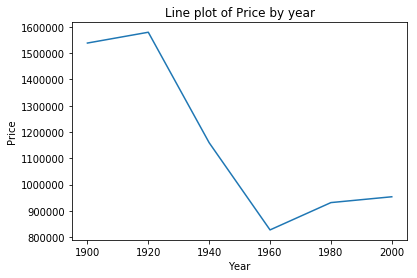

In [75]:
plt.plot(summary)
plt.title("Line plot of Price by year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

_Variable: 'Type'_

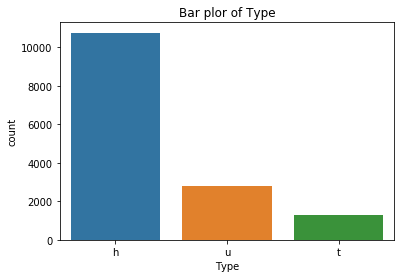

In [76]:
sns.countplot(data = df,x = 'Type')
plt.title("Bar plor of Type")
plt.show()

_From the following summary table, we can see that...._

In [77]:
print(housing.groupby('Type')['Rooms'].count())
print(housing.groupby('Type')['Car'].mean())

Type
h    10749
t     1265
u     2797
Name: Rooms, dtype: int64
Type
h    1.901182
t    1.600950
u    1.131059
Name: Car, dtype: float64


_Variable: CouncilArea_

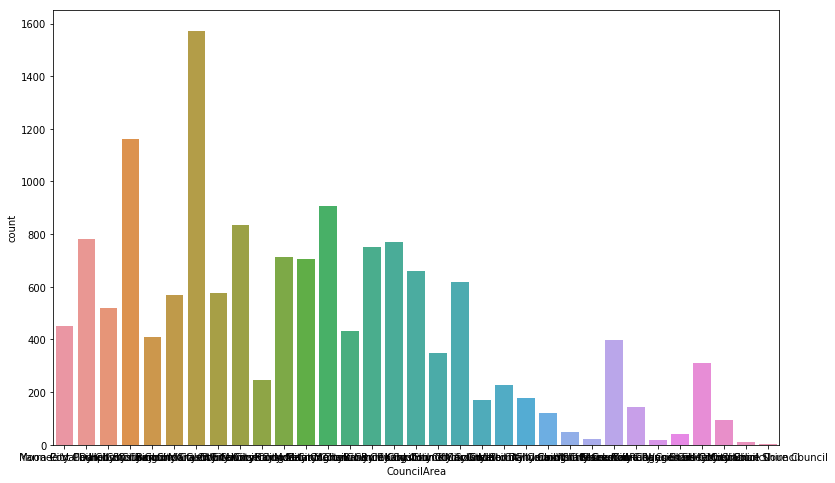

In [78]:
plt.figure(figsize=(13,8))
sns.countplot(data = df,x = 'CouncilArea')
plt.show()

In [80]:
print(housing.groupby('CouncilArea')['Price'].count().sort_values(ascending=False).head())

CouncilArea
Boroondara City Council       1048
Darebin City Council           943
Moreland City Council          761
Glen Eira City Council         692
Moonee Valley City Council     677
Name: Price, dtype: int64


_In this plot, we can see that Most of the houses/Apartment are concentrated in less than 10km from CBD("Central Business District "). And if the distance more than 40km, it barely not house/department exist._

    need explantation

_Variable: Method_

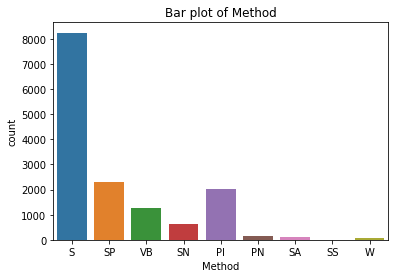

In [85]:
sns.countplot(data = df,x = 'Method')
plt.title("Bar plot of Method")
plt.show()

_Method:_

_S - property sold_

_SP - property sold prior_

_PI - property passed in_

_PN - sold prior not disclosed_

_SN - sold not disclosed_

_NB - no bid_

_VB - vendor bid_

_W - withdrawn prior to auction_

_SA - sold after auction_

_SS - sold after auction price not disclosed_

__b. scatter plots for relationships between numeric data__

__Cleaning Data__

_As usual, we delete the NA value in some variables, including 'Rooms','Price','Bedroom2','Bathroom','Landsize','Car','BuildingArea'_

In [109]:
df = housing.loc[((housing['Rooms'].isnull() == False) & 
                  (housing['Price'].isnull() == False) &  
                  (housing['Bedroom2'].isnull() == False) & 
                  (housing['Bathroom'].isnull() == False) & 
                  (housing['Car'].isnull() == False) & 
                 (housing['Landsize'].isnull() == False) & 
                 (housing['BuildingArea'].isnull() == False))]

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8513 entries, 2 to 34856
Data columns (total 24 columns):
Suburb             8513 non-null object
Address            8513 non-null object
Rooms              8513 non-null int64
Type               8513 non-null object
Price              8513 non-null float64
Method             8513 non-null object
SellerG            8513 non-null object
Date               8513 non-null object
Distance           8513 non-null float64
Postcode           8513 non-null float64
Bedroom2           8513 non-null float64
Bathroom           8513 non-null float64
Car                8513 non-null float64
Landsize           8513 non-null float64
BuildingArea       8513 non-null float64
YearBuilt          8513 non-null float64
CouncilArea        8513 non-null object
Lattitude          8506 non-null float64
Longtitude         8506 non-null float64
Regionname         8513 non-null object
Propertycount      8513 non-null float64
Real Rooms         8513 non-null float64


_After cleaning data, there are 8513 observations, 24 variables._

In [111]:
print(df.shape)

(8513, 24)


In [112]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,8513.0,3.100670e+00,0.964643,1.00000,2.000000,3.000000,4.000000e+00,1.200000e+01
Price,8513.0,1.064023e+06,648245.757270,131000.00000,630000.000000,877500.000000,1.310000e+06,9.000000e+06
Distance,8513.0,1.149550e+01,6.803366,0.00000,6.800000,10.500000,1.400000e+01,4.740000e+01
Postcode,8513.0,3.112093e+03,114.482828,3000.00000,3044.000000,3084.000000,3.150000e+03,3.977000e+03
Bedroom2,8513.0,3.080348e+00,0.967217,0.00000,2.000000,3.000000,4.000000e+00,1.200000e+01
Bathroom,8513.0,1.648185e+00,0.720383,1.00000,1.000000,2.000000,2.000000e+00,9.000000e+00
Car,8513.0,1.718078e+00,0.966873,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,8513.0,5.307871e+02,1068.639571,0.00000,221.000000,500.000000,6.550000e+02,4.280000e+04
BuildingArea,8513.0,1.492362e+02,88.102205,0.00000,100.000000,132.000000,1.800000e+02,3.112000e+03
YearBuilt,8513.0,1.969400e+03,32.723682,1900.00000,1950.000000,1970.000000,2.000000e+03,2.019000e+03


_Creating a new data frame only with numeric variables, which strong correlate with 'Price'_

In [113]:
df = df.loc[:,["Price","Rooms","Bathroom","Bedroom2","Car"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8513 entries, 2 to 34856
Data columns (total 5 columns):
Price       8513 non-null float64
Rooms       8513 non-null int64
Bathroom    8513 non-null float64
Bedroom2    8513 non-null float64
Car         8513 non-null float64
dtypes: float64(4), int64(1)
memory usage: 399.0 KB


__Pairplot__

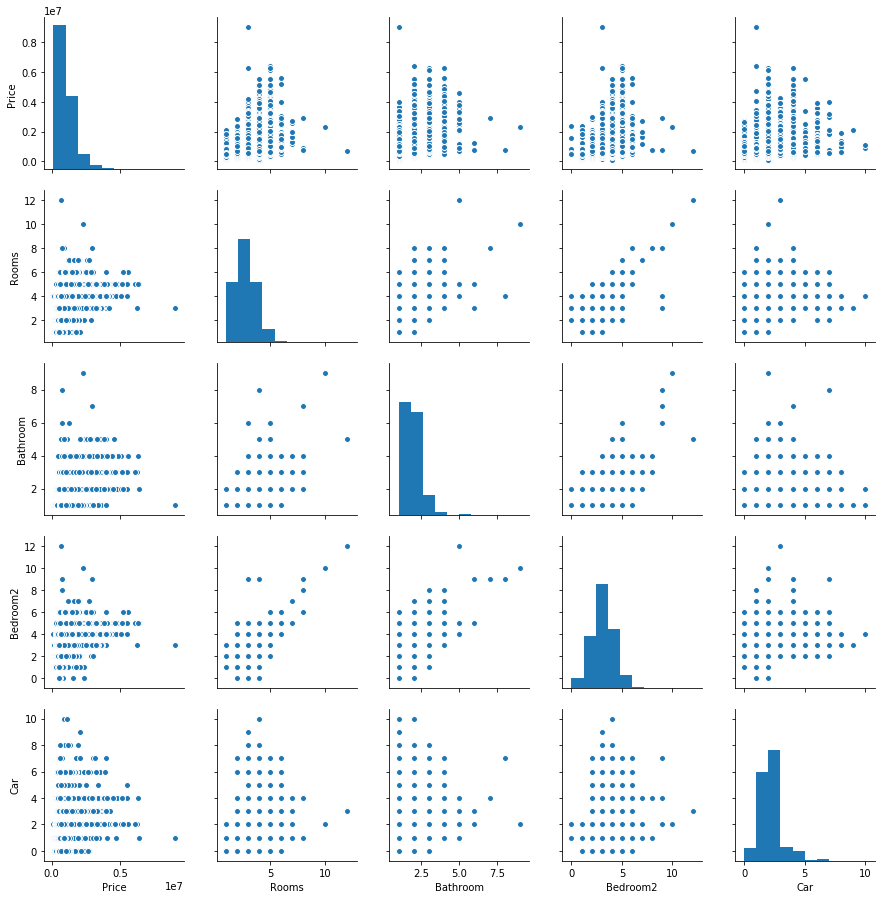

In [114]:
sns.pairplot(df)
plt.show()

__Linear Regression scatter plot__

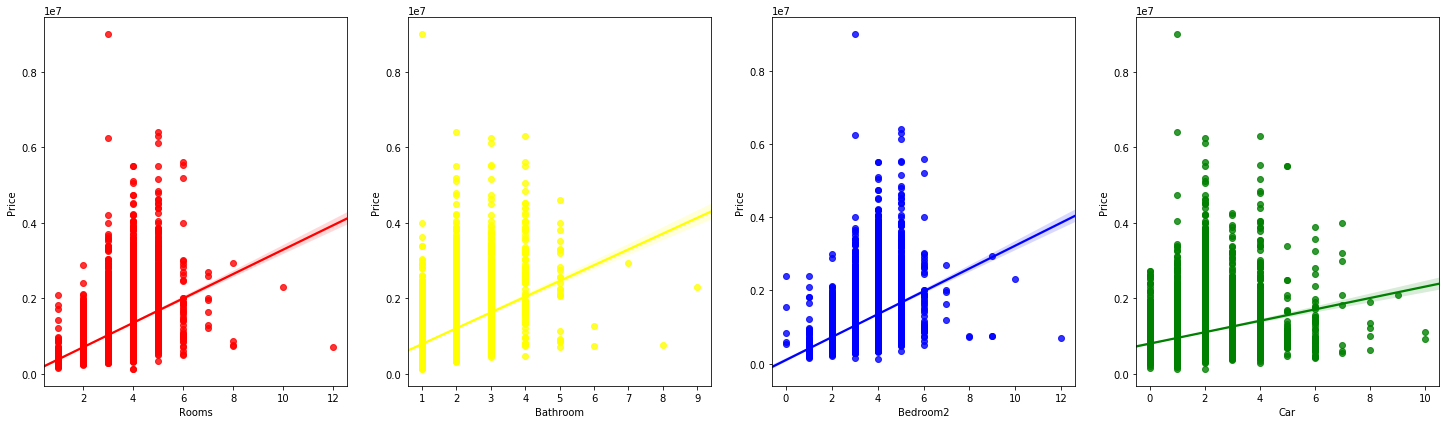

In [124]:
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(25, 6.78)

sns.regplot(df.Rooms,df.Price,color="red",ax=axs[0])

sns.regplot(df.Bathroom,df.Price,color="yellow",ax=axs[1])

sns.regplot(df.Bedroom2,df.Price,color="blue",ax=axs[2])

sns.regplot(df.Car,df.Price,color="green",ax=axs[3])

plt.show()

__Comparing the correlation coefficient among the variables 'Rooms'; 'Bathroom'; 'Bedroom'__

In [125]:
df = housing.loc[:,["Price","Rooms","Bathroom","Bedroom2"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14811 entries, 2 to 34856
Data columns (total 4 columns):
Price       11568 non-null float64
Rooms       14811 non-null int64
Bathroom    14810 non-null float64
Bedroom2    14811 non-null float64
dtypes: float64(3), int64(1)
memory usage: 1.2 MB


In [126]:
corr = df.corr()
print(corr)

             Price     Rooms  Bathroom  Bedroom2
Price     1.000000  0.485254  0.468264  0.472288
Rooms     0.485254  1.000000  0.630056  0.946628
Bathroom  0.468264  0.630056  1.000000  0.638901
Bedroom2  0.472288  0.946628  0.638901  1.000000


_Based on the scatter plots and correlation coefficient table above, we found that there are collinearity among the predictors "Rooms"; "Bathroom"; and "Bedroom". Thus, we may only pick one of them in the model._

__c. side-by-side histograms or boxplots for relationships between numeric and categorical data__

_Boxplot between ('Type'; 'Method'; 'RangeofDistance'; 'yeargroup') and 'Price'_

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 2 to 34856
Data columns (total 5 columns):
Price              11568 non-null float64
Method             11568 non-null object
RangeofDistance    11568 non-null category
yeargroup          11568 non-null category
Type               11568 non-null object
dtypes: category(2), float64(1), object(2)
memory usage: 384.3+ KB


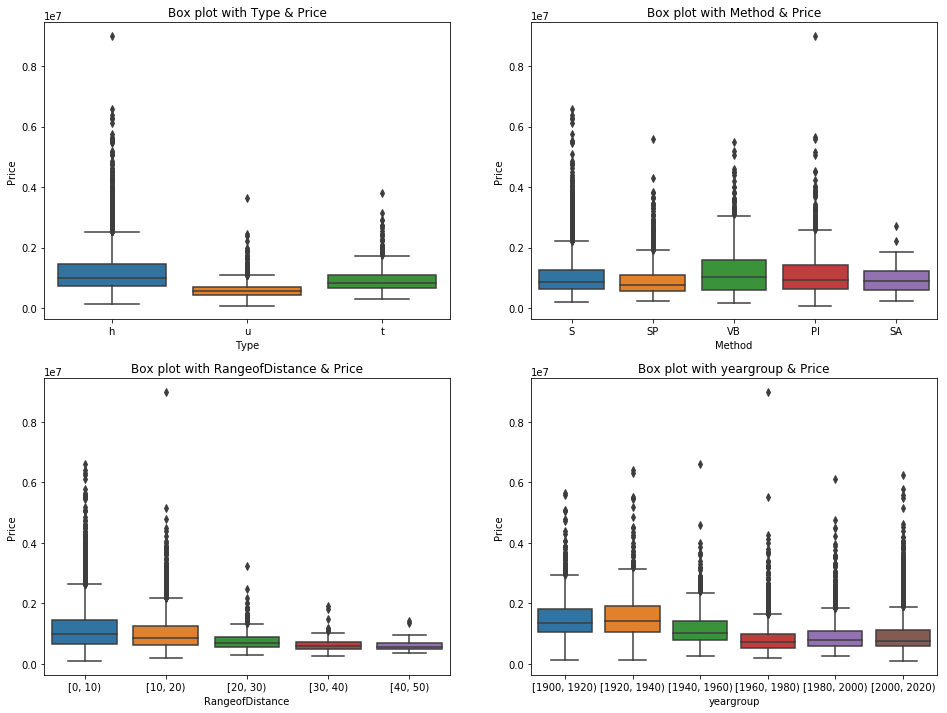

In [128]:
df = housing.loc[(housing['Price'].isnull() == False),["Price","Method","RangeofDistance","yeargroup","Type"]]
df.info()

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.boxplot(x="Type", y="Price", data = df)
plt.title("Box plot with Type & Price")

plt.subplot(2,2,2)
sns.boxplot(x="Method", y="Price", data = df)
plt.title("Box plot with Method & Price")

plt.subplot(2,2,3)
sns.boxplot(x="RangeofDistance", y="Price", data = df)
plt.title("Box plot with RangeofDistance & Price")

plt.subplot(2,2,4)
sns.boxplot(x="yeargroup", y="Price", data = df)
plt.title("Box plot with yeargroup & Price")

plt.show()

# Model



__Split cleaning data into training and testing date set__ 

In [129]:
df = housing.loc[:,["Price","Rooms","Bathroom","Bedroom2","Car", "RangeofDistance", "yeargroup"]]
df = df.loc[((df['yeargroup'].isnull() == False) & 
             (df['Price'].isnull() == False) &
             (df['Car'].isnull() == False))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11421 entries, 2 to 34856
Data columns (total 7 columns):
Price              11421 non-null float64
Rooms              11421 non-null int64
Bathroom           11421 non-null float64
Bedroom2           11421 non-null float64
Car                11421 non-null float64
RangeofDistance    11421 non-null category
yeargroup          11421 non-null category
dtypes: category(2), float64(4), int64(1)
memory usage: 557.8 KB


In [130]:
X = df[['Rooms', 'Bathroom', 'Bedroom2', 'Car', 'RangeofDistance', 'yeargroup']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

train = X_train
train["Price"] = pd.Series(y_train, index = train.index)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9136 entries, 32061 to 7348
Data columns (total 7 columns):
Rooms              9136 non-null int64
Bathroom           9136 non-null float64
Bedroom2           9136 non-null float64
Car                9136 non-null float64
RangeofDistance    9136 non-null category
yeargroup          9136 non-null category
Price              9136 non-null float64
dtypes: category(2), float64(4), int64(1)
memory usage: 446.3 KB


C:\Users\yvonne\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Model1 (numerical & categorical)

__Construct model with training data (numerical & categorical)__

In [131]:
model1 = smf.ols('Price ~ Rooms + Bathroom + Car + Bedroom2 + C(RangeofDistance) + C(yeargroup)', data = train) 
results1 = model1.fit()

__Summary table (numerical & categorical)__

In [132]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     666.2
Date:                Tue, 12 Jun 2018   Prob (F-statistic):               0.00
Time:                        11:46:10   Log-Likelihood:            -1.3209e+05
No. Observations:                9136   AIC:                         2.642e+05
Df Residuals:                    9122   BIC:                         2.643e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

_Based on the summary table, we will drop variable "Bedroom2" because its p-value is larger than 0.05. It is not significant._

_Actually, we found that the adjust R-squareds are the same with or without variable 'Bedroom2' in the model._

__ANOVA table (numerical & categorical)__

In [133]:
table = sm.stats.anova_lm(results1)
print(table)

                        df        sum_sq       mean_sq            F  \
C(RangeofDistance)     4.0  1.744204e+14  4.360511e+13   205.614688   
C(yeargroup)           5.0  4.727460e+14  9.454920e+13   445.835470   
Rooms                  1.0  9.419800e+14  9.419800e+14  4441.794226   
Bathroom               1.0  2.257577e+14  2.257577e+14  1064.533471   
Car                    1.0  2.175551e+13  2.175551e+13   102.585534   
Bedroom2               1.0  1.570096e+10  1.570096e+10     0.074036   
Residual            9122.0  1.934520e+15  2.120719e+11          NaN   

                           PR(>F)  
C(RangeofDistance)  3.809903e-169  
C(yeargroup)         0.000000e+00  
Rooms                0.000000e+00  
Bathroom            5.945984e-221  
Car                  5.531474e-24  
Bedroom2             7.855547e-01  
Residual                      NaN  


C:\Users\yvonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\yvonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\yvonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


__Prediction with testing data (numerical & categorical)__

In [134]:
y_pred = results1.predict(X_test)
print(y_pred.head())

34847    6.539236e+05
7183     8.635647e+05
25369    8.469502e+05
24419    6.192380e+05
9817     1.127759e+06
dtype: float64


__Compute mean squared error between y in testing data and prediction__

In [135]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

208638499736.74542


### Model2 (only with numerical)

__Construct model (only with numerical)__

In [136]:
model2 = smf.ols('Price ~ Rooms + Bathroom + Car + Bedroom2', data = train) 
results2 = model2.fit()

__Summary table (only with numerical)__

In [137]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     910.2
Date:                Tue, 12 Jun 2018   Prob (F-statistic):               0.00
Time:                        11:46:41   Log-Likelihood:            -1.3361e+05
No. Observations:                9136   AIC:                         2.672e+05
Df Residuals:                    9131   BIC:                         2.673e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4077.9875   1.91e+04      0.214      0.8

__ANOVA table (only with numerical)__

In [138]:
table = sm.stats.anova_lm(results2)
print(table)

              df        sum_sq       mean_sq            F         PR(>F)
Rooms        1.0  9.040134e+14  9.040134e+14  3061.620901   0.000000e+00
Bathroom     1.0  1.688115e+14  1.688115e+14   571.713763  1.322118e-122
Car          1.0  4.349114e+11  4.349114e+11     1.472914   2.249179e-01
Bedroom2     1.0  1.799843e+12  1.799843e+12     6.095525   1.357064e-02
Residual  9131.0  2.696136e+15  2.952728e+11          NaN            NaN


C:\Users\yvonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\yvonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\yvonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


__Prediction with testing data (only with numerical)__

In [139]:
y_pred = results2.predict(X_test)
print(y_pred.head())

34847    1.126217e+06
7183     8.682038e+05
25369    1.328254e+06
24419    8.682038e+05
9817     1.328254e+06
dtype: float64


__Prediction with testing data (only with numerical)__

In [140]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

303546361549.2424


_model 2 is not better than model 1 because mse1 = 208638499736.74542 is smaller than mse2 = 303546361549.2424_

### Model3 (using model1 but resplit the data set)

_Try to resplit the data set_

_model 3 is not better than model 1_

_mse3 = 218247129612.31937_

In [141]:
X = df[['Rooms', 'Bathroom', 'Bedroom2', 'Car', 'RangeofDistance', 'yeargroup']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.35, random_state= 50)

train = X_train
train["Price"] = pd.Series(y_train, index = train.index)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7423 entries, 24073 to 15539
Data columns (total 7 columns):
Rooms              7423 non-null int64
Bathroom           7423 non-null float64
Bedroom2           7423 non-null float64
Car                7423 non-null float64
RangeofDistance    7423 non-null category
yeargroup          7423 non-null category
Price              7423 non-null float64
dtypes: category(2), float64(4), int64(1)
memory usage: 362.6 KB


C:\Users\yvonne\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [284]:
model = smf.ols('Price ~ Rooms + Bathroom + Car + C(yeargroup) + C(RangeofDistance)', data = train) 
results = model.fit()

print(results.summary())

table = sm.stats.anova_lm(results)
print(table)

y_pred = results.predict(X_test)
print(y_pred.head())

mse = mean_squared_error(y_test, y_pred)
print(mse)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     605.0
Date:                Tue, 12 Jun 2018   Prob (F-statistic):               0.00
Time:                        00:26:58   Log-Likelihood:            -1.0725e+05
No. Observations:                7423   AIC:                         2.145e+05
Df Residuals:                    7410   BIC:                         2.146e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

C:\Users\yvonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\yvonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\yvonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


### Model 4 (using model 1 but regroup the yeargroup based on medium)

_model 4 is better than model 1_

_mse4 = 153048728106.24393_

                     Price
yeargroup                 
[1965, 1975)  7.894192e+05
[1975, 1985)  8.578595e+05
[1985, 1995)  9.233559e+05
[1995, 2005)  9.456095e+05
[2005, 2015)  9.229580e+05
[2015, 2025)  1.225991e+06
(6, 1)
[1965 1975 1985 1995 2005 2015]
             Price
1965  7.894192e+05
1975  8.578595e+05
1985  9.233559e+05
1995  9.456095e+05
2005  9.229580e+05
2015  1.225991e+06


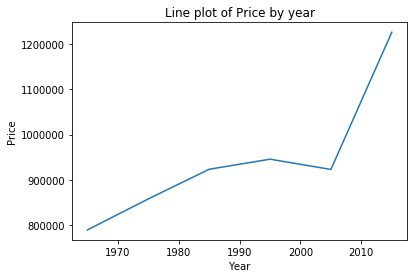

In [17]:
# starting with the medium of YearBuilt
housing["yeargroup"] = pd.cut(housing.YearBuilt,bins=np.arange(1965,2050,10),right=False)
summary = housing.groupby('yeargroup')[["Price"]].mean()
summary = summary.dropna()
print(summary)
print(summary.shape)

index = np.array([1965,1975,1985,1995,2005,2015])
print(index)
summary.index = index
print(summary)

plt.plot(summary)
plt.title("Line plot of Price by year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

housing["RangeofDistance"] =pd.cut(housing.Distance,bins=np.arange(0,60,10),right=False)

df = housing.loc[:,["Price","Rooms","Bathroom","Bedroom2","Car", "RangeofDistance", "yeargroup"]]
df = df.loc[((df['yeargroup'].isnull() == False) & 
             (df['Price'].isnull() == False) &
             (df['Car'].isnull() == False))]
df.info()

In [295]:
X = df[['Rooms', 'Bathroom', 'Bedroom2', 'Car', 'RangeofDistance', 'yeargroup']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 50)

train = X_train
train["Price"] = pd.Series(y_train, index = train.index)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 10528 to 27154
Data columns (total 7 columns):
Rooms              5576 non-null int64
Bathroom           5576 non-null float64
Bedroom2           5576 non-null float64
Car                5576 non-null float64
RangeofDistance    5576 non-null category
yeargroup          5576 non-null category
Price              5576 non-null float64
dtypes: category(2), float64(4), int64(1)
memory usage: 272.5 KB


C:\Users\yvonne\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [296]:
model = smf.ols('Price ~ Rooms + Bathroom + Car + C(yeargroup) + C(RangeofDistance)', data = train) 
results = model.fit()

print(results.summary())

table = sm.stats.anova_lm(results)
print(table)

y_pred = results.predict(X_test)
print(y_pred.head())

mse = mean_squared_error(y_test, y_pred)
print(mse)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     361.8
Date:                Tue, 12 Jun 2018   Prob (F-statistic):               0.00
Time:                        00:30:39   Log-Likelihood:                -80274.
No. Observations:                5576   AIC:                         1.606e+05
Df Residuals:                    5563   BIC:                         1.607e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

C:\Users\yvonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\yvonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\yvonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
